# Problem set 1 (55 pts)

## Important information

1. We provide signatures of the functions that you have to implement. Make sure you follow the signatures defined, otherwise your coding solutions will not be graded.

2. Please submit the single Jupyter Notebook file, where only Python and Markdown/$\LaTeX$
 are used. Any hand-written solutions inserted by photos or in any other way are prohibitive and will not be graded. If you will have any questions about using Markdown, ask them!

3. The works will be checked for plagiarism. The score will be divided by the number of similar works.

## Problem 1 (25 pts)

Assume we have a set of data points $x^{(i)}\in\mathbb{R}^{n},\,i=1,\dots,m$, and decide to represent this data as a matrix

$$
  X =
    \begin{pmatrix}
      | & & | \\
      x^{(1)} & \dots & x^{(m)} \\
      | & & | \\
    \end{pmatrix} \in \mathbb{R}^{n \times m}.
$$

We suppose that $\text{rank}\,X = r$.

In all tasks below, we ask you to find the rank of some matrix $M$ related to $X$.
In particular, you need to find relation between $\text{rank}\,X = r$ and $\text{rank}\,M$, e.g., that the rank of $M$ is always larger/smaller than the rank of $X$ or that $\text{rank}\,M = \text{rank}\,X \big / 35$.
Please support your answer with legitimate arguments and make the answer as accurate as possible.

Note that depending on the structure of the matrix $X$, border cases are possible.
Make sure to cover them in your answer correctly.

**Task 1.** (5 pts)
In applied statistics and machine learning, data is often normalized.
One particularly popular strategy is to subtract the estimated mean $\mu$ and divide by the square root of the estimated variance $\sigma^2$. i.e.
 $$x \rightarrow (x - \mu) \big / \sigma.$$

After the normalization, we get a new matrix

  \begin{equation}
    \begin{split}
      Y &:=
      \begin{pmatrix}
        | & & | \\
        y^{(1)} & \dots & y^{(m)} \\
        | & & | \\
      \end{pmatrix},\\
      y^{(i)} &:= \frac{x^{(i)} - \frac{1}{m}\sum_{i=1}^{m} x^{(i)}}{\sqrt{\frac{1}{m}\sum_{i=1}^{m} \left(x^{(i)}\right)^2 - \left(\frac{1}{m}\sum_{i=1}^{m} x^{(i)}\right)^2}}.
    \end{split}
  \end{equation}
  
What is the rank of $Y$ if $\text{rank} \; X = r$?



##### Solution

Elementary operations which don't change rank:
1) row interchange
2) row multiplication (on non zero scalar)
3) row addition

Let's consider matrix Y and apply elementary operations in following way:

First of all denomiator of (1) is constant vector and deviding each row on some constant is elementary operation which don't change rank.

Then interchange columns such that in first r columns $x^{(i)} - \frac{1}{m} \sum_{i = 1}^{m} x^{(i)} = x^{(i)} - E$ we have linearly independent first terms
$x^{(i)}\in \{ x^{(i)} \}_{i = 1}^{r}$ . We can do it since original matrix X has $rk(X) = r$

Then instead of first column we can put difference between 1-st and 2-nd columns and obtain $y^{(1)} = x^{(1)} - x^{(2)}$ . Doing same up to r-1 column we will have:

$$
  Y =
    \begin{pmatrix}
      | & |&&|& |& &| \\
      x^{(1)}-x^{(2)} & x^{(2)}-x^{(3)} &\dots& x^{(r-1)}-x^{(r)} & x^{(r)} - E & \dots & x^{(m)} - E \\
      | & |&&|&|&&| \\
    \end{pmatrix} 
$$

So we see that at least first r - 1 columns are linearly independent, since $ \{ x^{(i)} \}_{i = 1}^{r}$ are linearly independent.

It gives us lower bound for $rkY$

$$
rkY \geq r - 1
$$


In order to derive upper bound let's consider following decomposition of original matrix Y

$$
Y = X  M,
$$

where X is original matrix and 

$$

  M =
    \begin{pmatrix}
      \frac{m-1}{m} & -\frac{1}{m}  & \dots & -\frac{1}{m}\\
      \\
      -\frac{1}{m} & \frac{m-1}{m}  &  & \vdots\\
      \vdots && \ddots & -\frac{1}{m} \\
      \\
      -\frac{1}{m} & \dots & -\frac{1}{m}   & \frac{m-1}{m} \\
    \end{pmatrix} \in \mathbb{R}^{m \times m}.
  
$$

If we sum all columns of M we obtain zero column, which means $rkM \le m - 1$

To find we will use following therem:
$$
rk(XM) \le min(rk(X), rk(M))
$$

Applying to our case:

$$
rk(Y) = rk(XM) \le min(rk(X), rk(M)) \le min(r, m-1)
$$

If $r < m - 1$, then $$r - 1 \le rk(Y) \le r$$

If $r > m - 1$ then $$r - 1 \le rk(Y) \le m - 1$$


$m = r$ is full rank case and $m < r$ is impossible since original matrix X has $rk(X) = r$ so there are at least r columns 

So, finaly answer is $$r - 1 \le rk(Y) \le r$$




As an example of lower bound we can consider identity matrix

$$
  X =
    \begin{pmatrix}
      1 & 0&0 \\
      0&1&0 \\
      0&0&1 \\
    \end{pmatrix} 
$$

And example of apper bound is
$$
  X =
    \begin{pmatrix}
      1 & 0&0&1&0&1 \\
      0&1&0&1&1&0 \\
      0&0&1&0&1&1 \\
    \end{pmatrix} 
$$

##### Answer: $r-1, r$

**Task 2.** (5 pts)
To reveal the structure of data one often considers similarity measures such as [cosine distance](https://en.wikipedia.org/wiki/Cosine_similarity)
  
  $$
    d_{c}\left(x^{(i)}, x^{(j)}\right) := 1 - \frac{\sum_{k=1}^{n}x^{(i)}_{k} x^{(j)}_{k}}{\sqrt{\sum_{k=1}^{n}\left(x^{(i)}_{k}\right)^{2}}\sqrt{\sum_{k=1}^{n}\left(x^{(j)}_{k}\right)^{2}}} = 1 - \frac{\left(x^{(i)}\right)^{\top} x^{(j)}}{\left\|x^{(i)}\right\|_{2}\left\|x^{(j)}\right\|_{2}}.
  $$

  Consider a matrix with cosine distances $D = [d_{ij}]$ such that
  $$
    d_{ij} = d_{c}\left(x^{(i)}, x^{(j)}\right).
  $$

  What is the rank of $D$ if $\text{rank} \; X = r$?


##### Solution

First of all we normalize matrix X

$$x^{(i)} = \frac{x^{(i)}}{\|x^{(i)}\|}$$

Since it is elementary operation it does not change rank of X

Then we can consider matrix D as following:

$$
D = 1 - X^{T}X,
$$
where $1$ is matrix full of 1

Using rank inequality
$$
rk(A + B) \le rk(A) + rk(B)
$$

we derive upper bound

$$
rk(1 - X^{T}X) \le rk(1) + rk(X^{T}X)
$$

Since $rk(AB) \le min(rk(A), rk(B)) $ and $rk(1) = 1$ we can finally write upper bound
$$
rk(1 - X^{T}X) \le r + 1
$$


To find lower bound let's proof that $rk(X^TX) = rk(X)$

$A \in \mathbb{R}^{n \times m}, Z \in \mathbb{R}^{m \times 1}$ and we will proof that $A^TAZ = 0 \iff AZ = 0$

$AZ = 0 \Longrightarrow A^TAZ = 0$, it is clear

Let $A^TAZ = 0$ and $Y = AZ$

Then $Z^TA^TY = Z^TA^TAZ = 0$ and $(AZ)^TY = 0$

So, we see $Y^TY = 0$

Since Y is real, it is clear that $Y = 0$ 

$Y = AZ = 0$

We proved that $A^TA\in \mathbb{R}^{m \times m}$ and $A\in \mathbb{R}^{n \times m}$ have same null space

Recall Rank–nullity theorem:
Let $T :V\rightarrow W$ be a linear transformation. Then

$$
rk(T) + nullity(T) = dim(V)
$$

In our case 
$$nullity(A^TA) + rk(A^TA) = m$$
$$nullity(A) + rk(A) = m$$

And hence $$rk(A) = rk(A^TA)$$


Since $rk(X^TX) = r$, we can repeat same prosidure as in Task 1 to estimate lower bound. So we interchange columns such that first r columns are linearly independent. Then we build matrix $1 - X^{T}X$.
Instead of first column we put differense between second and first and so on up to r - 1 column. So out of original matrix $D$ , with elementary we operations we obtain

$$
  Y =
    \begin{pmatrix}
      | & |&&|& |& &| \\
      x^{(1)}-x^{(2)} & x^{(2)}-x^{(3)} &\dots& x^{(r-1)}-x^{(r)} & 1 - x^{(r)} & \dots & 1 - x^{(m)}  \\
      | & |&&|&|&&| \\
    \end{pmatrix} 
$$

where $x^{(i)}$ is column of matrix $X^TX$

First r-1 columns are linearly independent and it gives us lower bound

##### Answer: $r-1, r, r+1$

**Task 3.** (15 pts)
Transformation in Task 1 has a form $x \rightarrow a x + b$, where $a \in \mathbb{R}$ and $b \in \mathbb{R}^n$.
In this task, we explore more general transformations.

- Let $y^{(i)} = A x^{(i)} + b$, where $A\in \mathbb{R}^{p\times n}$, $b \in \mathbb{R}^{p}$. What possible ranks matrix
  \begin{equation}
    \begin{split}
      Y &:=
      \begin{pmatrix}
        | & & | \\
        y^{(1)} & \dots & y^{(m)} \\
        | & & | \\
      \end{pmatrix}
    \end{split}
  \end{equation}
  may have for different $A$?
  

We can rewite original problem in matrix form:
$$Y = AX + B$$

where $B\in \mathbb{R}^{p\times m}$ is matrix with column $b$, repeated $m$ times

Then we can use lower and upper bounds for rank of matrix sum:
$$
rk(AX)-rk(B)\leq rk(AX + B)\leq rk(AX) + rk(B)
$$

Rank $B$ can be equal to 0 or 1. And $0\le rk(A) \le r$

With this boundary cases above inequolity becomes
$$0\leq rk(AX + B)\leq r + 1
$$



  - If $p > n$ is it possible that $\text{rank}\,Y > \text{rank}\,X$?


$B\in \mathbb{R}^{p \times m}$
$A\in \mathbb{R}^{p \times n}$
$X\in \mathbb{R}^{n \times m}$


Let's consider the case when $n = m < p$; $rk(A) = n$ and $rk(X) = r = n$. Then if $b$ is linearly independent with basis coluns of $AX$, $AX + B $ can have rank r + 1 and as a result
$
rk(Y) = r + 1 > r = rk(X)
$
.So, yes it is possible

  

  
  - If $p = n$ and both matrix $A$ and vector $b$ are not identically zeros how small the rank of $Y$ can be?




Let's take X such that $rk(X) = 1$, $A = I$. Then $rk(AX) = 1$ (using the fact that $rk(AB) \le min(rk(A), rk(B))$)

So $rk(AX) = 1$ means that matrix $AX$ has only one linearly independent column. Moreover, if $AX$ consists of repetition of this column, then we can take $B = -AX$ and then $AX + B$ will be equal to zero matrix, with zero rank. 

This all possible if we consider matrix $X$ with some column $x$ repeated $m$ times
 


  - How large the rank of $Y$ can be?


Y can have rank r + 1, as shown above


- Let $y^{(i)} = w \odot x^{(i)} + b$, where $w, b \in \mathbb{R}^{n}$ and $\odot$ is an [Hadamard product](https://en.wikipedia.org/wiki/Hadamard_product_(matrices)).

What possible ranks matrix $Y$ may have for different $w$ and $b$?

Y can be written as 

$$Y = WX + B$$
where W is diagonal matrix, that's why is full rank

Because of above inequolity on rank of matrix sum we get

$$
min(r, min(p, n)) - 1 \leq rk(Y) \leq min(r, min(p, n)) + 1
$$
where $rk(X) = r$

## Problem 2 (10 pts)

- Let $\| \cdot \|$ and $\| \cdot \|'$ be norms on a vector space $X$, and let $B$ and $B'$ denote the corresponding close unit balls.
Prove that $B \subseteq B'$ iff $\| \cdot \|' \leq \| \cdot \|$ for any input vectors.
    


$$\| x \|^{'} \le \| x \| \Longrightarrow B\subseteq B^{'}$$

$B = \{u \in V : \|u\| \le 1\}$ 
\
$B^{'} = \{u \in V : \|u\|^{'} \le 1\}$

Since $\| x \|^{'} \le \| x \|$ 
\
$B = \{u \in V : \|u\|^{'}  \le \|u\| \le 1\}$ 

It means that every vector $u \in B$ is also belongs to $B^{'}$

Now let's consider boundaty of $B^{'}$ when $\| u \|^{'} =1$

Then $B = \{u \in V : 1  \le \|u\| \le 1\}$ and boundaries coiside, $B = B^{'}$

But if inequlity is strong $\| u \|^{'} < \| u \|$ then ther is no vectors $u$ laying on boundary of $B^{'}$ and same time belong to $B$, because such set is empty $B = \{u \in V : 1  < \|u\| \le 1\}$


$$B\subseteq B^{'}  \Longrightarrow \| x \|^{'} \le \| x \|$$

It means that any $u \in B$ belongs to $B^{'}$. Formally it means that if $\|u\| \le 1$ then $\|u\|^{'} \le 1$

And same time exists $u \in B^{'}$ which does not belong to $B$. So if  $\|u\|^{'} \le 1$ then $\|u\| > 1$ and it leads to desirable inequality $\| u \|^{'} \le \| u \|$




Let $1 \leq p \leq q \leq \infty$:

-  Prove that $\| \cdot \|_q \leq \| \cdot \|_p$ on $\mathbb{R}^n$



We will proof it with following inequlity wich holds for all $k \ge 1$

$$\left( \sum |a_i| \right) ^k \ge \sum |a_i|^{k}$$

We need to proof that

$$\left( \sum |a_i|^{p} \right) ^{\frac{1}{p}} \ge \left( \sum |a_i|^{q} \right)^{{\frac{1}{q}}}$$

In order to do it let's consider following sum
$$ \left( \sum |a_i|^{p} \right) ^{\frac{q}{p}}$$

Apply above inequolity

$$ \left( \sum |a_i|^{p} \right) ^{\frac{q}{p}} \ge \left( \sum |a_i|^{q} \right)$$

Povering left and right part in the $\frac{1}{q}$ power we obtain

$$ \left( \sum |a_i|^{p} \right) ^{\frac{1}{p}} \ge \left( \sum |a_i|^{q} \right)^{\frac{1}{q}}$$



- Show that there exists a constant $C = C(n,p,q) > 0$ such that $\| \cdot \|_p \leq C\| \cdot \|_q$ on $\mathbb{R}^n$



Let us remind Holder's inequolity

$$\sum _{k=1}^{n}|x_{k}\,y_{k}|\leq {\biggl (}\sum _{k=1}^{n}|x_{k}|^{t}{\biggr )}^{\frac {1}{t}}{\biggl (}\sum _{k=1}^{n}|y_{k}|^{d}{\biggr )}^{\frac {1}{d}}{\text{ for all }}(x_{1},\ldots ,x_{n}),(y_{1},\ldots ,y_{n})\in \mathbb {R} ^{n}{\text{ or }}\mathbb {C} ^{n}$$
and $\frac{1}{t} + \frac{1}{d} = 1$

Let's rewrite inequolity using relation between $t$ and $d$

$\sum _{k=1}^{n}|x_{k}\,y_{k}|\leq {\biggl (}\sum _{k=1}^{n}|x_{k}|^{t}{\biggr )}^{\frac {1}{t}}{\biggl (}\sum _{k=1}^{n}|y_{k}|^{\frac{t}{t-1}}{\biggr )}^{\frac {t-1}{t}}$

Then instead of $|x_{k}|$ we put $|x_{k}|^p$, instead of vector $y$ we put identity vector and $t = \frac{q}{p}$ and get

$\sum _{k=1}^{n}|x_{k}|^{p}\leq {\biggl (}\sum _{k=1}^{n}|x_{k}|^{q}{\biggr )}^{\frac {p}{q}}n^{1 - \frac{p}{q}}$

Taking power $\frac{1}{p}$ we come to the expression

${\biggl (}\sum _{k=1}^{n}|x_{k}|^{p}{\biggl )}^{\frac{1}{p}}\leq {\biggl (}\sum _{k=1}^{n}|x_{k}|^{q}{\biggr )}^{\frac {1}{q}}n^{\frac{1}{p} - \frac{1}{q}}$


Then $C = n^{\frac{1}{p} - \frac{1}{q}}$



- Can the above constant be chosen in such a way that it does not depend on $n$?


In order to answer the question let's take identity vector and put in into inequolity $\| \cdot \|_p \leq C\| \cdot \|_q$. Then we get

$n^{\frac{1}{p}} \le n^{\frac{1}{q}} C$

And finaly $C \ge n^{\frac{1}{p} - \frac{1}{q}}$. For a given $n, p, q$ we can find constant $C$ which does not depent on $n$


- Find the smallest possible $C(n,p,q)$ with the above property.

## Problem 3: Recover 3D molecule structure via low-rank approximation (20 pts)

***Chromatin***

Imagine you are given the task of understanding the structure of a complex geometric shape, but there's a catch: you can not observe the shape directly in three dimensions.
Instead, you can only infer its structure by studying the points of contact between different parts of the shape.
This is analogous to the challenge faced in 3D chromatin modeling, where the goal is to understand the three-dimensional organization of the DNA sequence within a cell's nucleus—a structure too tiny and complex to be directly observed in detail.

To tackle this, scientists employ a technique known as Hi-C.
The Hi-C technique generates a symmetric matrix such that elements in the matrix quantify the interaction frequencies between pairs of chromatin segments.
The higher values indicate a higher propensity for spatial proximity.
We consider $N$ segments, therefore the dimension of the resulting matrix is $N \times N$.

Mathematically, the matrix is sparse due to the infrequent interactions between most DNA segments and has a block diagonal structure reflecting clusters of interactions within certain genomic regions.
The matrix patterns are analyzed using algorithms and statistical models to infer the three-dimensional chromatin structure.

Let us inspect what Hi-C looks like!

In [1]:
!pip install plotly
!pip install patsy

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.2.2 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 kB 1.5 MB/s eta 0:00:001.7 MB/s eta 0:00:01

[notice] A new release of pip available: 22.2.2 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [247]:
import numpy as np
import pandas as pd
import scipy as sp
from matplotlib import pyplot as plt, cm
from matplotlib import colors

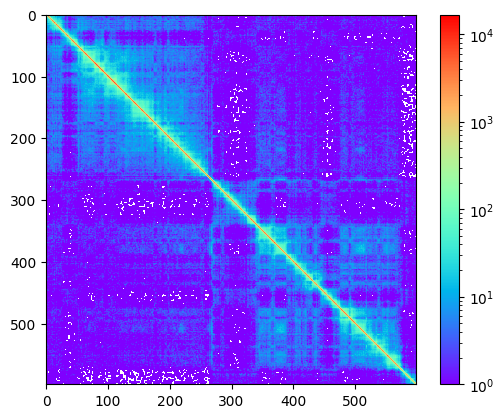

C shape (599, 599) n=599


In [248]:
path = 'IMR90_100kb_chr20.csv'
C = np.array(pd.read_csv(f'{path}', header=None))

# Removes the blanks obainted during the experiment
mask = (C == 0).all(0)
index = np.where(~mask)[0]
C = C[~mask,:]
C = C[:,~mask]


im = plt.imshow(C, cmap=cm.rainbow, norm=colors.LogNorm())
plt.colorbar(im)
plt.show()

print('C shape', C.shape, f'n={C.shape[0]}')

Recall that our goal is to infer the 3D chromatin structure.
Mathematically, we model the chromatin as a smooth curve in 3D space.
That is, the points lie on a smooth parametrized curve $x_1, \ldots x_n \in \gamma(t)$, where $\gamma(t)=\left(\begin{array}{c}\gamma_1(t) \\ \gamma_2(t) \\ \gamma_3(t)\end{array}\right)$.

Each coordinate can be expanded using [cubic spline basis functions](https://en.wikipedia.org/wiki/Spline_interpolation) $h_1(t), \ldots, h_k(t)$ evaluated at the sequence of coordinates at $t=1, \ldots, n = 599$  :
$$
\gamma_j(t)=\sum_{\ell=1}^k \Theta_{\ell j} h_{\ell}(t), \quad j=1,2,3
$$

$$
x_i=\gamma(i)=
\begin{pmatrix}
\sum_{\ell=1}^k \Theta_{\ell 1} h_{\ell}(i) \\
\sum_{\ell=1}^k \Theta_{\ell 2} h_{\ell}(i) \\
\sum_{\ell=1}^k \Theta_{\ell 3} h_{\ell}(i)
\end{pmatrix}
$$

$$
X=\begin{pmatrix}
-x_1^\top - \\
\cdots \\
-x_n^\top-
\end{pmatrix}
=
\begin{pmatrix}
\mid & \mid & \mid \\
\gamma_1 & \gamma_2 & \gamma_3 \\
\mid & \mid & \mid
\end{pmatrix} \in \mathbb{R}^{n \times 3}
$$

Thus, we can rewrite the coordinates of the chromatin stacked in matrix $X$ as product $X=H \Theta$, where

$$
H=\begin{pmatrix}
\mid & & \mid \\
h_1 & \ldots & h_k \\
\mid & & \mid
\end{pmatrix} \in \mathbb{R}^{n \times k}
$$

The optimization problem that will infer the 3D structure is the following:

$$
\ell\left(x_1, \ldots, x_n\right)=\sum_{i=1}^n \sum_{j=1}^n\left(Z_{i j}-\left\langle x_i, x_j\right\rangle\right)^2 \to \min_{\Theta \in \mathbb{R}^{k \times 3}}
$$

or equivalently

$$
 \min_{\Theta \in \mathbb{R}^{k \times 3}}\|Z-S(X)\|_F^2 = \min_{\Theta \in \mathbb{R}^{k \times 3}} \|Z-S(H \Theta)\|_F^2
$$

where $Z$ is a normalized Hi-C matrix and $S$ is some additional map.

The following cell performs the normalization step so you do not have to worry about it.

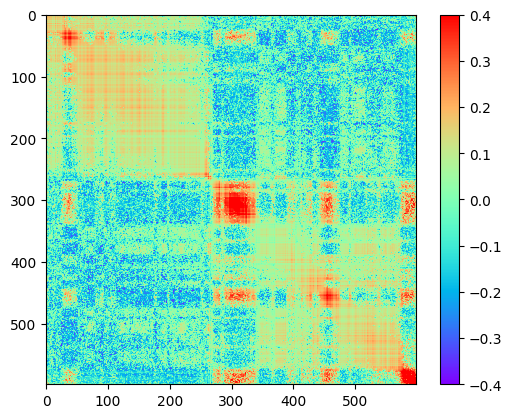

In [249]:
import patsy

def scale(y, center=True, scale=True):
    x = y.copy()
    if center:
        x -= x.mean(axis=0)
    if scale and center:
        x /= x.std()
    return x

df = 50
n_knots = df - 4
knots = np.linspace(1, max(index), n_knots, dtype='int64')
knots = knots[1:n_knots-1]
B0 = patsy.bs(index, df = df, include_intercept=True)
H = B0[::]

D = 1/(C+1)
Z = -D**2/2
Z = scale(Z, center = True, scale = False)
Z = (scale(Z.T, center = True, scale = False)).T

im = plt.imshow(Z, cmap=cm.rainbow, norm=colors.Normalize(vmin=-0.4, vmax=0.4))
plt.colorbar(im)
plt.show()

**Task 1.** (5 pts) Prove the Lemma:

If $H \in \mathbb{R}^{n \times k}$ is a matrix with orthogonal columns, i.e. $H^\top H=I$, and $S(X)=X X^\top$ then problem

$$
\min_{\Theta \in \mathbb{R}^{k \times 3}} \|Z-S(H \Theta)\|_F^2
$$

is equivalent to

$$
\min_{\Theta \in \mathbb{R}^{k \times 3}} \left\|H^T Z H-\Theta \Theta^T\right\|_F^2.
$$

##### Solution

First of all recal that


\begin{aligned}

\left\|A\right\|_{F}^{2}=Tr\left[AA^{*}\right]

\end{aligned}

And in real case 

\begin{aligned}

\left\|A\right\|_{F}^{2}=Tr\left[AA^{T}\right]

\end{aligned}

Then $ \|Z-S(H \Theta)\|_F^2 = \|Z- H\Theta \Theta ^T H^T \|_F^2 = Tr[(Z - H\Theta \Theta ^T H^T)(Z^T - H\Theta \Theta ^T H^T)] = Tr[ZZ^T - ZH \Theta \Theta ^T H^T - H \Theta \Theta ^T H^T Z^T + H \Theta \Theta^T H^T H \Theta \Theta^TH^T] = Tr[ZZ^T] - Tr[ZH \Theta \Theta^TH^T] - Tr[H \Theta \Theta^T H^T Z^T] + Tr[ \Theta \Theta^T \Theta \Theta^T H^T H] = Tr[ZZ^T] - Tr[ZH \Theta \Theta^TH^T] - Tr[H \Theta \Theta^T H^T Z^T] + Tr[ \Theta \Theta^T \Theta \Theta^T]$


$\left\|H^T Z H-\Theta \Theta^T\right\|_F^2 = Tr[(H^TZH - \Theta \Theta ^T )(H^TZ^TH - \Theta \Theta ^T)] = Tr[H^TZHH^TZ^TH] - Tr[ZH \Theta \Theta^TH^T] - Tr[H \Theta \Theta^T H^T Z^T] + Tr[ \Theta \Theta^T \Theta \Theta^T]$


We see that 
$$\|Z- H\Theta \Theta ^T H^T \|_F^2 = F(\Theta) + Tr[ZZ^T]$$

$$\left\|H^T Z H-\Theta \Theta^T\right\|_F^2 = F(\Theta) + Tr[H^TZHH^TZ^TH]$$

Second term in each expressions does not depend on $\Theta$ that's why it does not effect on feasible set and on solution of optimisation problem, because if $\Theta$ is optimal parameter for first problem, it is obviously optimal for the second one

**Task 2.** Solving the problem

$$
\min_{\Theta \in \mathbb{R}^{k \times 3}} \left\|H^\top Z H-\Theta \Theta^\top\right\|_F^2.
$$

can be interpreted as approximating the matrix $H^\top Z H$ by a positive semidefinite rank-3 matrix $\Theta \Theta^\top$.

Assuming that the symmetric matrix $H^\top Z H$ has at least $3$ positive eigenvalues the solution can be found via eigendecomposition of $H^\top Z H$:

Let $H^\top Z H=Q \Lambda Q^\top$ for orthogonal $Q$ and diagonal $\Lambda=\operatorname{diag}\left(\lambda_1, \ldots, \lambda_n\right)$ with $\lambda_1 \geq \lambda_2 \geq \ldots \geq \lambda_n$, then

$$
\Theta=Q \sqrt{\Lambda_3} \text {, where } \sqrt{\Lambda_3}=\operatorname{diag}\left(\sqrt{\lambda_1}, \sqrt{\lambda_2}, \sqrt{\lambda_3}, \ldots, 0, 0\right) .
$$

The computational efficiency of the approach derives from the fact that it relies on eigen-decomposition of a small $k \times k$ matrix, requiring only $O\left(k^3\right)$ additional operations.

In this task, we will write a function that finds the optimal 3D chromatin representation for the given Hi-C matrix.
We do that by optimizing the functional from task 1.



- (5 pts) If you recall, the lemma from task 1 requires $H$ to have orthogonal columns.
Write a code to verify whether it is true. If it is not, propose and compare the ways to ortogonalize it.




In [250]:
import numpy as np
from matplotlib.ticker import MaxNLocator


In [251]:
def if_orthogonal(H):

    return np.all(np.abs(H.T @ H - np.eye(H.shape[1])) < 1e-14)


def simple_ortho(v):
  u = np.copy(v)
  for i in range(v.shape[1]):
    u[:,i+1:] -= v[:,i:i+1].T @ v[:,i+1:] / np.linalg.norm(v[:,i])**2 * v[:,i:i+1]
    u[:,i] /= np.linalg.norm(u[:,i])
  return u


def error_aware_ortho(v):
  u = np.copy(v)
  for i in range(v.shape[1]):
    u[:,i+1:] -= u[:,i:i+1].T @ u[:,i+1:] / np.linalg.norm(u[:,i])**2 * u[:,i:i+1]
    u[:,i] /= np.linalg.norm(u[:,i])
  return u

In [252]:
if_orthogonal(H)

False

In [253]:
Q, R = np.linalg.qr(H)

print(np.linalg.norm(Q.T @ Q - np.eye(Q.shape[1])))

if_orthogonal(Q)

2.0330392114264e-15


True

In [254]:
U = simple_ortho(H)

print(np.linalg.norm(U.T @ U - np.eye(U.shape[1])))

if_orthogonal(U)

3.1473246566978927


False

In [255]:
U_good = error_aware_ortho(H)

print(np.linalg.norm(U_good.T @ U_good - np.eye(U_good.shape[1])))

if_orthogonal(U_good)

2.333155522521486e-15


True

There are QR decomposition, unstable and stable gram schmidt ortogonalization. We see that  unstable gram schmidt ortogonalization does not even orthogonolaise columns. QR and stable gram schmidt work

- (10 pts) You are given below a template for function ```low_rank_approximation```.
Complete the code for minimizing  $\tilde{\ell}(\Theta)$ using the proposed low rank approach.
Remember that we model chromatin as 3D curve so the rank of our decomposition should be 3.
However, compare it for different ranks: plot the loss value against the ranks (small, medium, large) and plot the reconstructed matrix.
Which rank would be a good fit?

The optimal loss value is 0.024434653807743647


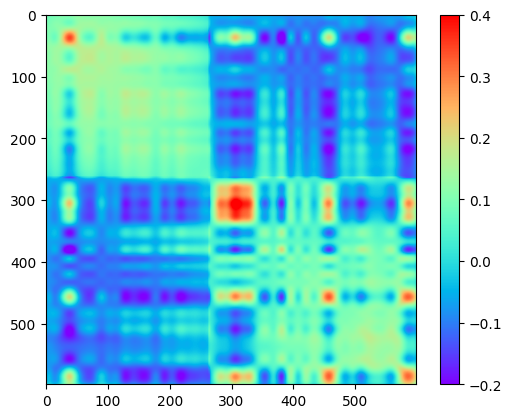

In [256]:
loss_ = lambda X, Z: np.mean((Z - X @ X.T)**2)

H = error_aware_ortho(H)

def low_rank_approximation(Z, H, rank=3):
    '''
    Solves the minimization problem from task 1

    - Z: normalized Hi-C counts matrix
    - H: orthogonal matrix
    - k: the rank of the eigendecomposition

    returns:
    - Theta: optimal Theta
    - loss: calcluated using ```loss_```
    - adj_rank: the rank adjusted for numerical stability. Usage: adj_rank = np.sum(eigen_values > 1e-12)
    '''
      ### your code is here

    eigenvalues, eigenvectors = np.linalg.eig(H.T @ Z @ H)

    eigenvalues = eigenvalues.clip(min=0)    

    tmp = np.zeros(eigenvalues.size)
    tmp[:rank] = eigenvalues[:rank]

    Theta = eigenvectors @ (np.diag(tmp))**(1 / 2)

    X = H @ Theta
    return {'Theta': Theta,
    'X': X,
    'loss': loss_(X, Z),
    'adj_rank': np.sum(eigenvalues > 1e-12)}


Theta, X, loss, rank = low_rank_approximation(Z, H, rank=3).values()
Z_hat = X @ X.T
print('The optimal loss value is', loss)


im = plt.imshow(Z_hat, cmap=cm.rainbow, norm=colors.Normalize(vmin=-0.2, vmax=0.4))
plt.colorbar(im)
plt.show()


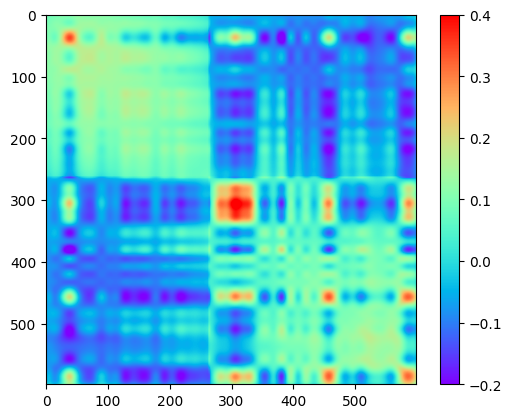

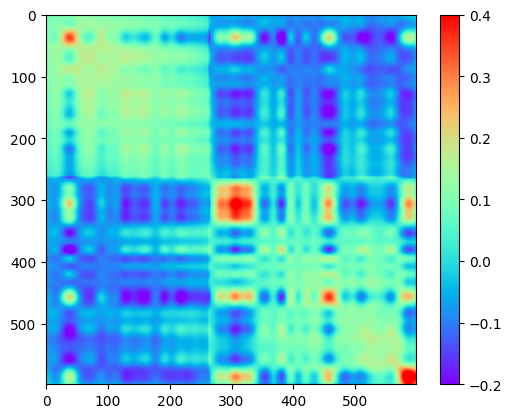

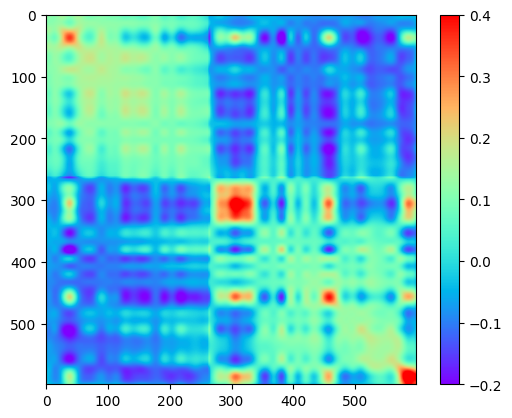

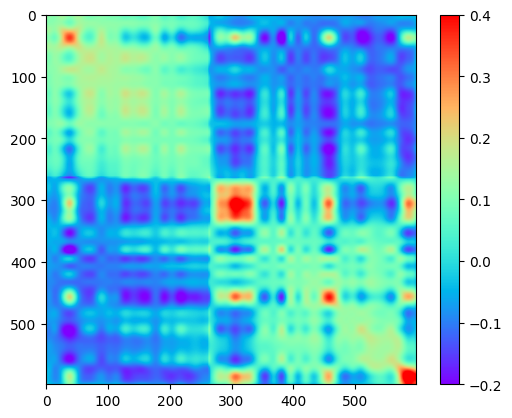

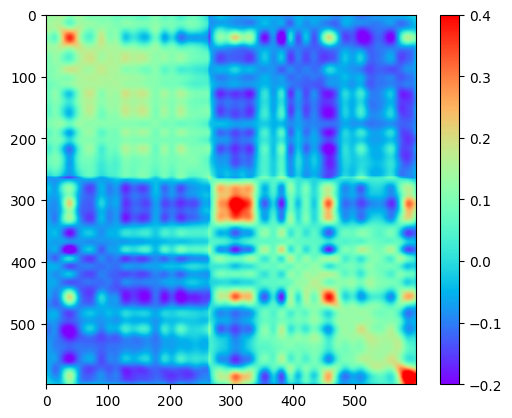

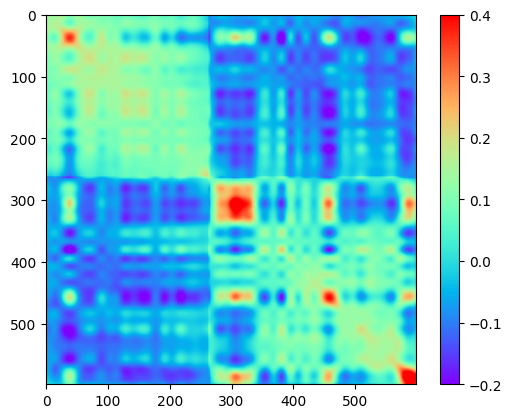

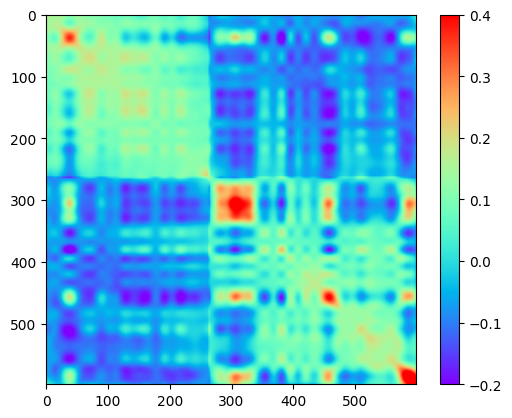

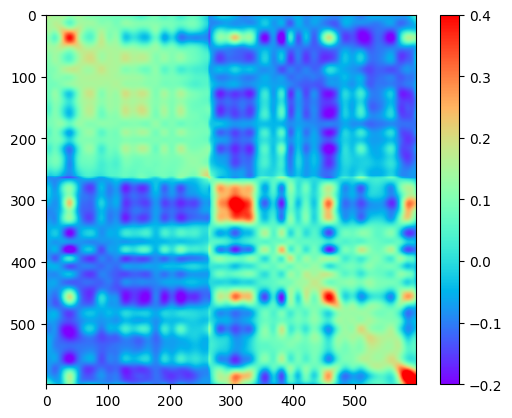

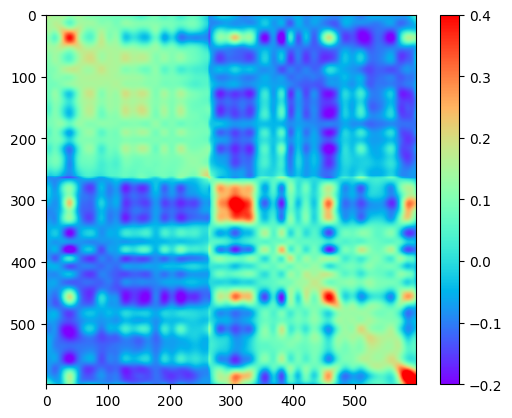

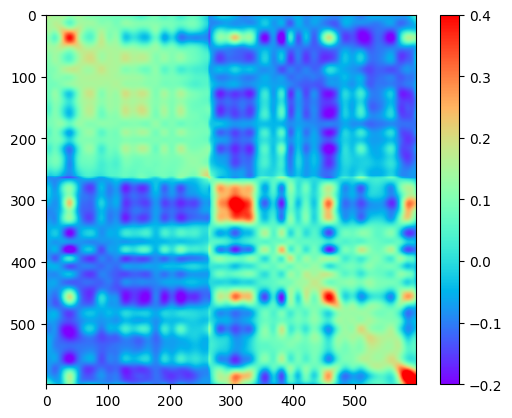

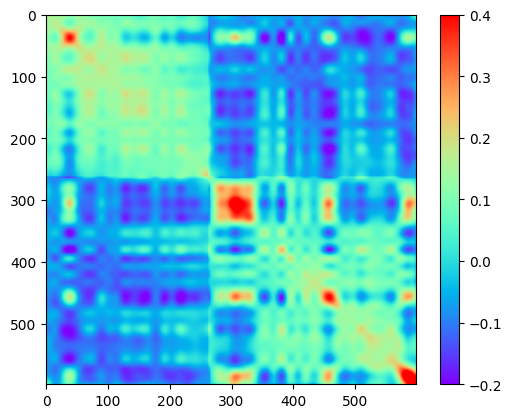

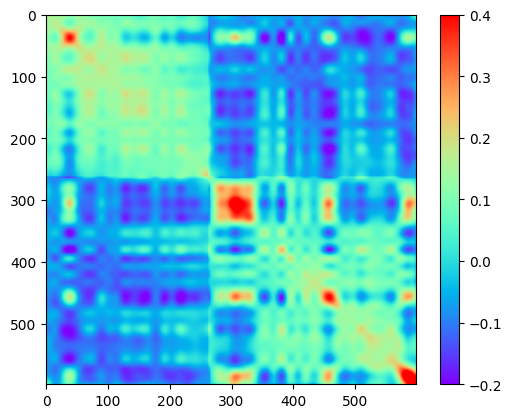

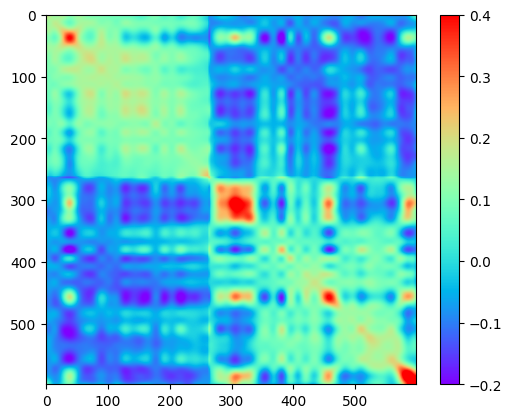

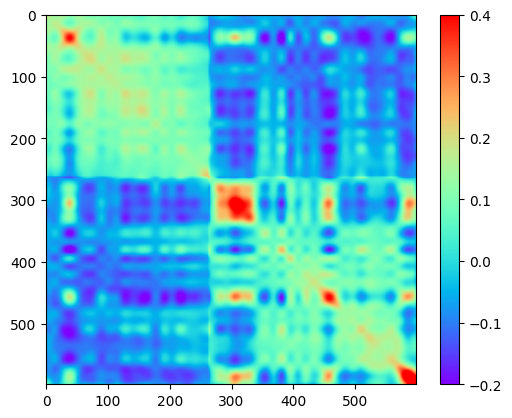

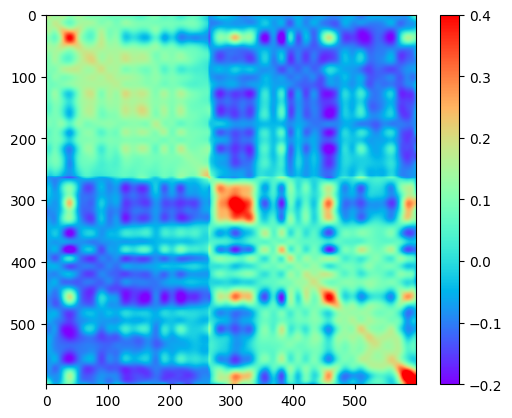

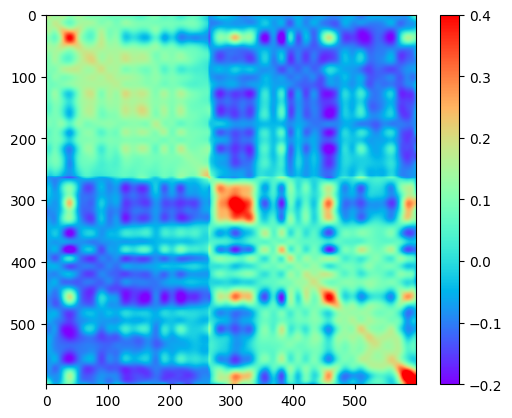

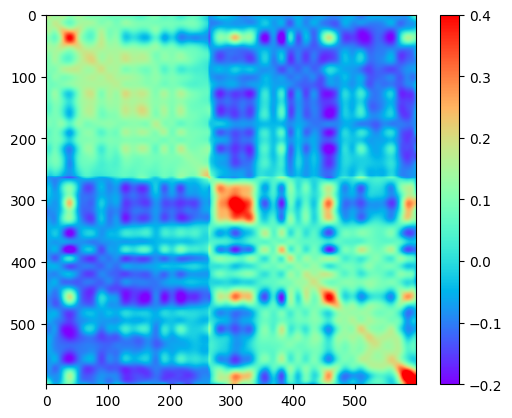

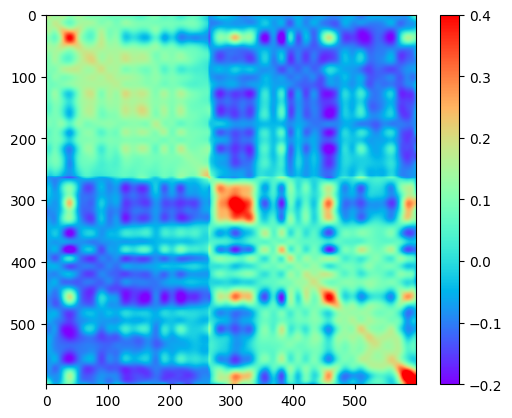

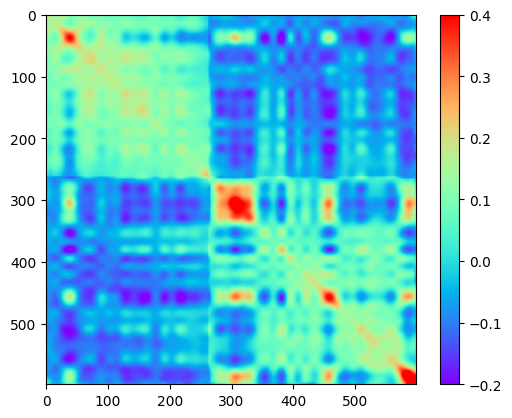

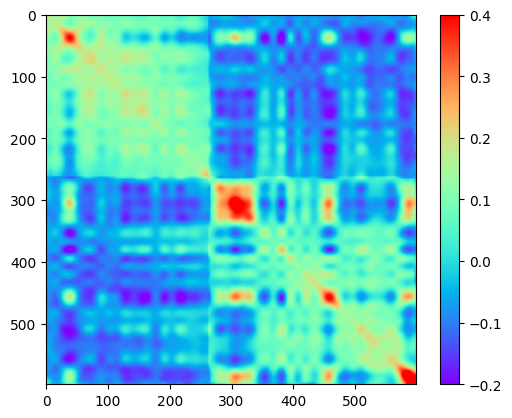

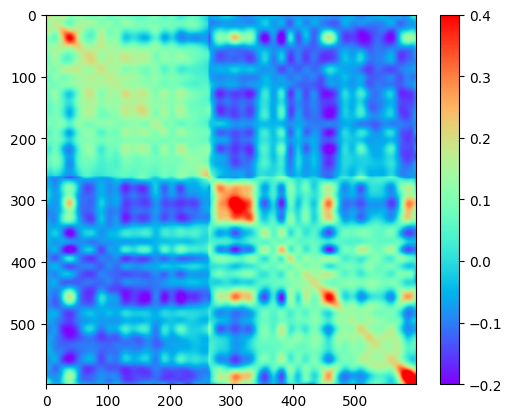

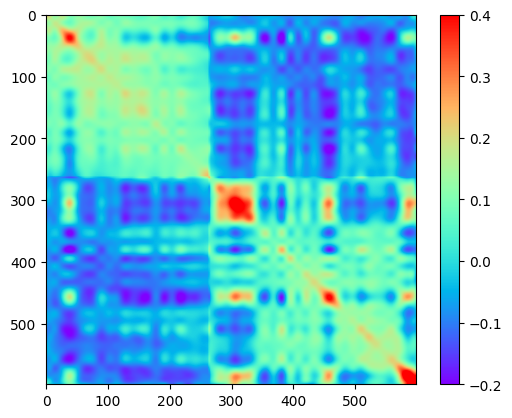

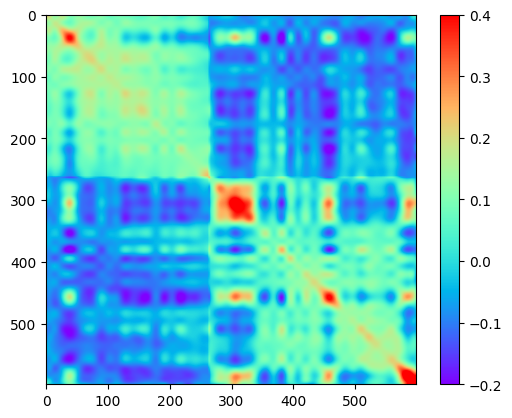

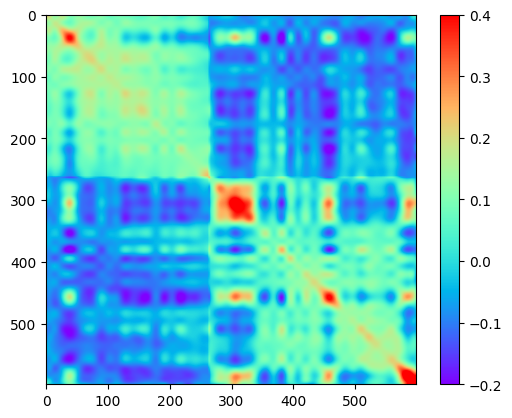

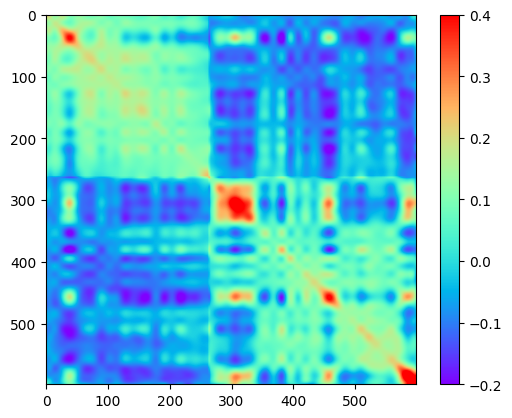

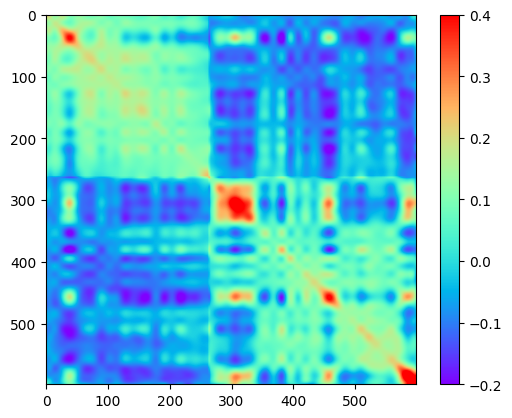

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


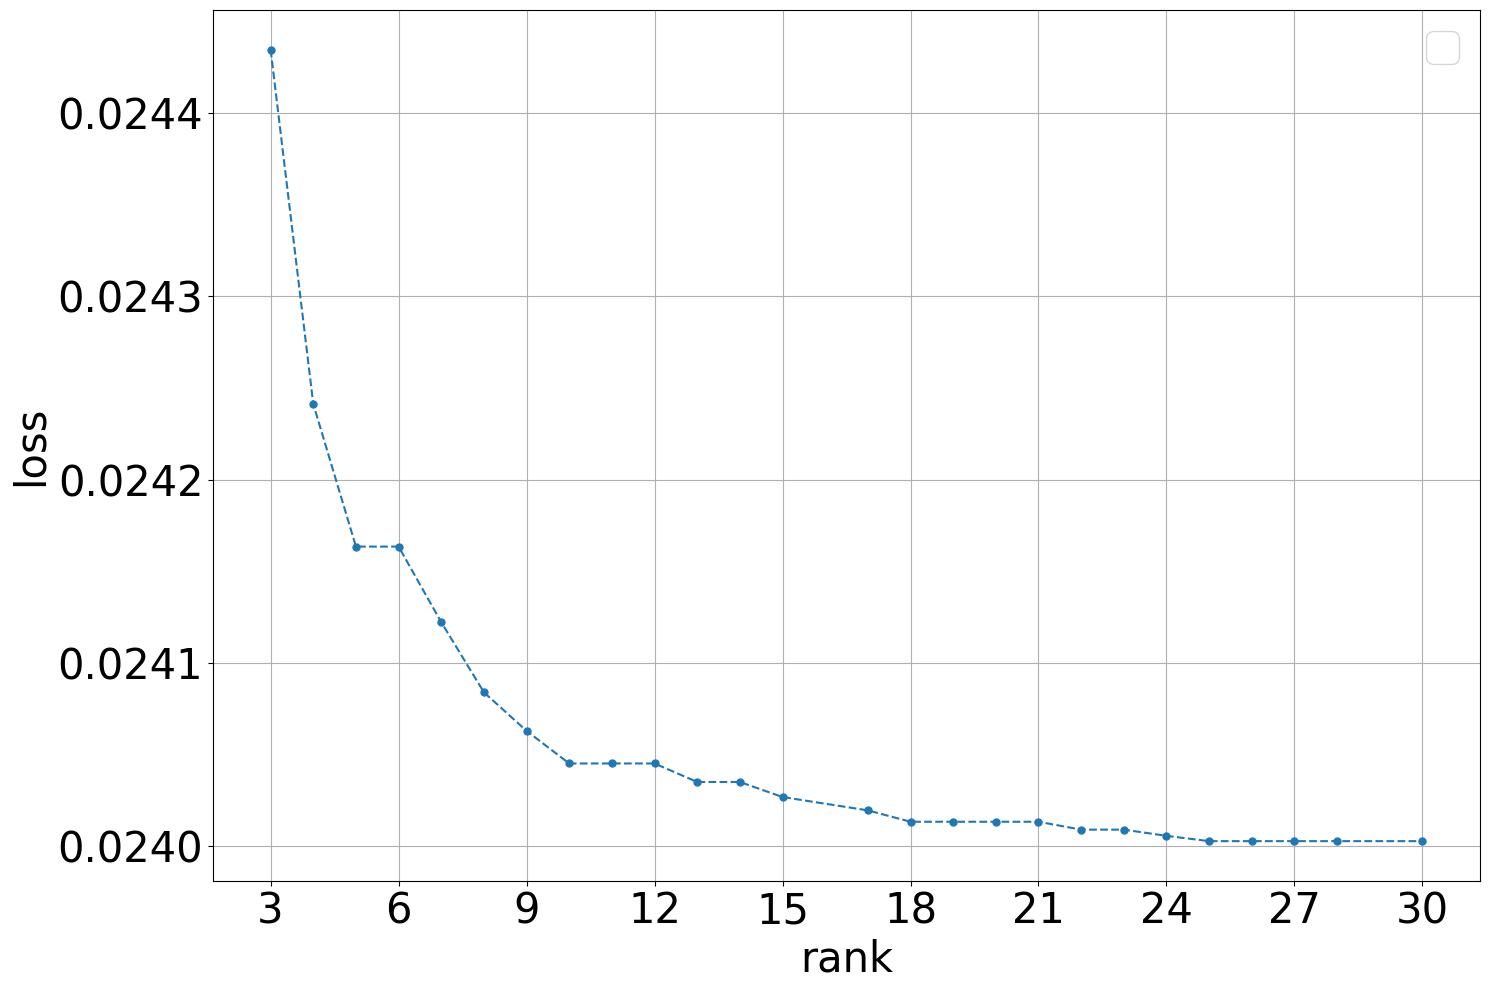

In [257]:
loss_array = np.array([])
rank_array = np.linspace(3, 30, 26, dtype=int) 

for r in rank_array:
    
    Theta, X, loss, rank = low_rank_approximation(Z, H, rank=r).values()
    Z_hat = X @ X.T

    im = plt.imshow(Z_hat, cmap=cm.rainbow, norm=colors.Normalize(vmin=-0.2, vmax=0.4))
    plt.colorbar(im)
    plt.show()

    loss_array = np.append(loss_array, loss)



f,ax1 = plt.subplots(1,figsize = (15,10))

ax1.plot(rank_array, loss_array, '.--',markersize=10)

ax1.grid(alpha = 1)
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
ax1.set_xlabel('rank', fontsize = 30 )
ax1.set_ylabel('loss', fontsize = 30 )

ax1.legend(fontsize = 30)


ax1.tick_params(axis='x', labelsize=30)
ax1.tick_params(axis='y', labelsize=30)


plt.tight_layout()  


Loss does not change for rank > 25, but I would say rank = 8 is enought because difference with higher rank loss is by order $10^{-4}$